In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, norm, mannwhitneyu, pearsonr)

# ___Comparing Means of Two Paired Samples___
-------------

In [10]:
data = pd.read_csv("../data/nhanes_2015_2016.csv", usecols = ["RIDRETH1", "RIAGENDR", "RIDAGEYR", "BPXSY1", "BPXSY2"]).dropna(axis = 0)

In [11]:
data.columns

Index(['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BPXSY1', 'BPXSY2'], dtype='object')

In [12]:
# The NHANES dataset contains two variables measuring the systolic blood pressure.
# These two measurements are there to check the reliability of the measurements. 

# BPXSY1", "BPXSY2"

In [13]:
data.shape

(5369, 5)

In [14]:
# Q. Does the two variables of systolic blood pressure differ significantly for female Hispanic adults living in the US, in 2015 - 2016?

In [15]:
hispf_1 = data.BPXSY1[(data.RIAGENDR == 2) & ((data.RIDRETH1 == 1) | (data.RIDRETH1 == 2))]
hispf_2 = data.BPXSY2[(data.RIAGENDR == 2) & ((data.RIDRETH1 == 1) | (data.RIDRETH1 == 2))]

In [22]:
ssize = hispf_1.size
ssize

911

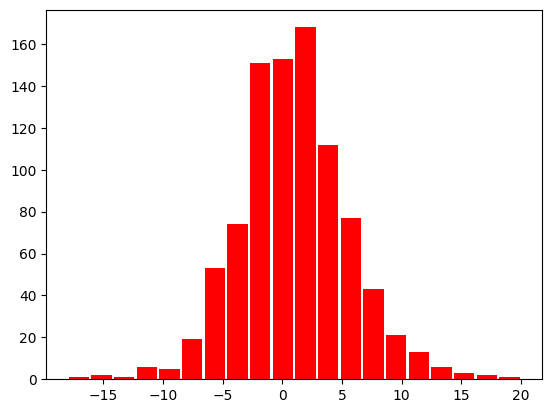

In [37]:
fig, axes = plt.subplots()
axes.hist(hispf_1 - hispf_2, bins = 20, rwidth = 0.9, color = "red")
plt.show()

In [38]:
# There seems to be a slight right skew.

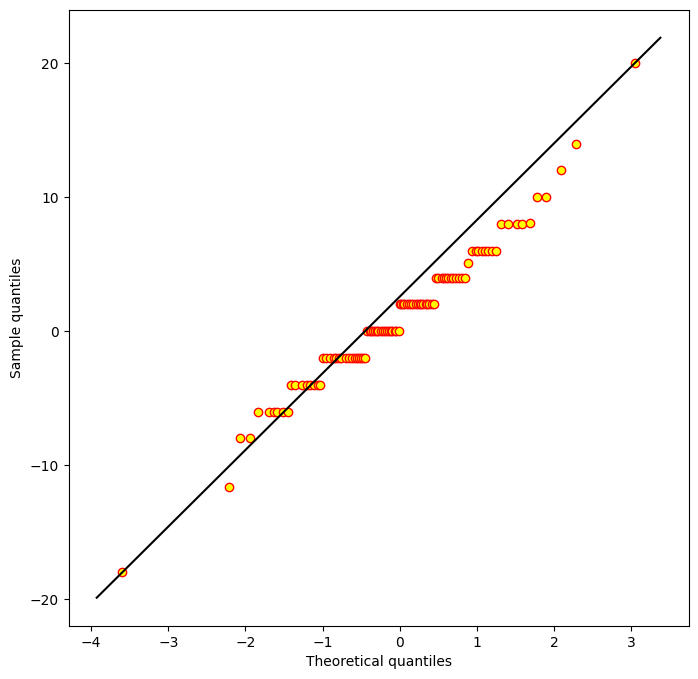

In [46]:
q = np.linspace(0, 1, num = 100)
qnorm = np.quantile(np.random.standard_normal(size = 1000), q)

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(qnorm, np.quantile(hispf_1 - hispf_2, q), color = "yellow", edgecolor = "red")
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "black")
axes.set_xlabel("Theoretical quantiles")
axes.set_ylabel("Sample quantiles")
plt.show()

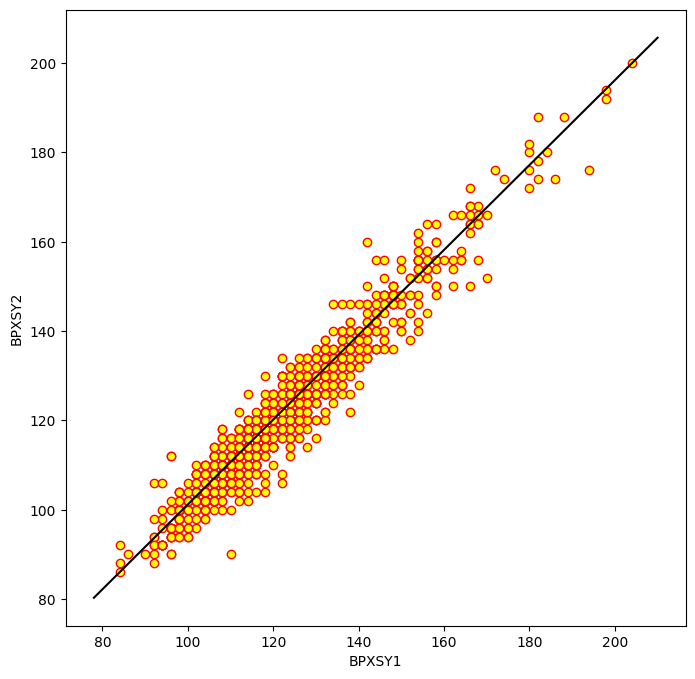

In [47]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(hispf_1, hispf_2, color = "yellow", edgecolor = "red")
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "black")
axes.set_xlabel("BPXSY1")
axes.set_ylabel("BPXSY2")
plt.show()

## ___Using Confidence Intervals___
-------------------

In [23]:
# Our best estimate is the difference between the sample means

best_est = (hispf_1 - hispf_2).mean()
best_est

0.9769484083424808

In [60]:
ssize

911

In [25]:
# confidence interval = best estimate +- margin of error
# margin of error = multiplier * standard error

# Since we are dealing with means, we'll use the t multiplier,

tscore = t.ppf(0.975, df = ssize - 1)
tscore

1.9625742877989996

In [26]:
# estimated standard error, 

stderr = (hispf_1 - hispf_2).std() / np.sqrt(ssize)
stderr

0.16063151116287777

In [27]:
# margin of error

moerr = tscore * stderr
moerr

0.31525127361856187

In [28]:
# 95% confidence interval

lcb, ucb = best_est - moerr, best_est + moerr
lcb, ucb

(0.6616971347239189, 1.2921996819610426)

In [52]:
# It appears that our confidence interval does not include 0.0, so we cannot say that 0 is a possible value for
# the difference in the population means of the two blood systolic pressure variables.

# To satisfy Null hypothesis, our confidence interval must include 0.0

# From the confidence intervals, we disagree with the assumption that the two measures are reliable. (identical)

In [53]:
# The correlation between the two measures of systolic blood pressure,

np.corrcoef(hispf_1, hispf_2)

array([[1.        , 0.96633489],
       [0.96633489, 1.        ]])

In [54]:
pearsonr(hispf_1, hispf_2)

PearsonRResult(statistic=0.9663348874892709, pvalue=0.0)

## ___Using Hypothesis Tests___
-----------------

In [55]:
# Null hypothesis: The mean difference of the two systolic blood pressure measures of hsipanic women in US, 2015 - 2016 is 0.0
# Alternative hypothesis: The mean difference of the two systolic blood pressure measures of hsipanic women in US, 2015 - 2016 is not 0.0
# (two tailed)

In [62]:
# best estimate is the difference between sample means,

best_est = (hispf_1 - hispf_2).mean()
best_est

0.9769484083424808

In [63]:
# estimated standard error,

stderr = (hispf_1 - hispf_2).std() / np.sqrt(ssize)
stderr

0.16063151116287777

In [64]:
# test statistic, since we are dealing with means, we'll use a t statistic,

tstat = (best_est - 0) / stderr
tstat

6.081922539792773

In [65]:
p = 2 * (1 - t.cdf(tstat, df = ssize - 1))
p

1.7463916979210126e-09

In [66]:
# Our p value is way smaller than the confidence level of 0.05
# So we reject the Null hypothesis.

# There's enough evidence that the difference in the two systolic blood pressure measures of hispanic female population, living in the US in
# 2015 - 2016 is not 0.0